# Sentiment Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
product_df =  pd.read_csv('Reviews.csv')

In [3]:
product_df.shape

(568454, 10)

In [4]:
product_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
product_df['ProductId'].value_counts().nlargest(20)

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
B001RVFEP2    564
B001RVFERK    564
B007M832YY    564
B0026KPDG8    564
B006HYLW32    564
B0013NUGDE    564
B000KV7ZGQ    556
B000KV61FC    556
B0013A0QXC    542
B005K4Q37A    542
Name: count, dtype: int64

In [14]:
data_df = product_df.loc[product_df['ProductId']=='B001RVFERK'].copy()

In [15]:
data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
485256,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
485257,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
485258,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
485259,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
485260,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,These chips are great! They look almost like ...


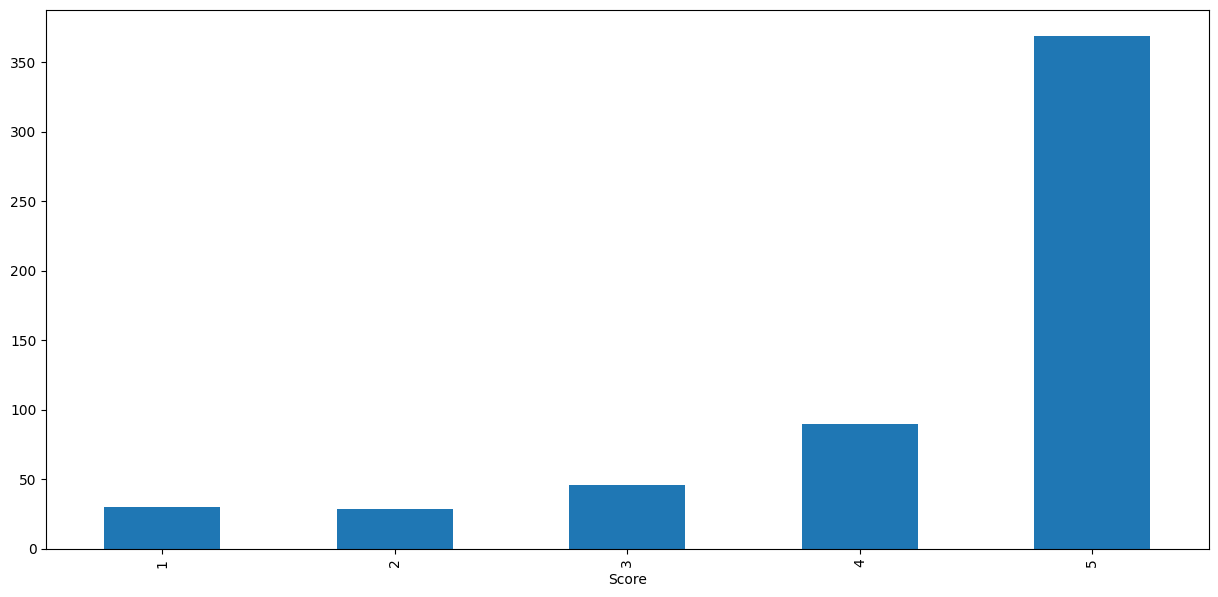

In [17]:
ax =  data_df['Score'].value_counts().sort_index().plot(kind='bar',figsize=(15,7))
plt.show()

In [18]:
data_df.reset_index(inplace=True,drop=True)

In [19]:

data_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,485257,B001RVFERK,A21SYVGVNG8RAS,Jennifer Sullivan,1,1,5,1298851200,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,485258,B001RVFERK,AQJYXC0MPRQJL,B. Perrin,1,1,5,1298851200,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
2,485259,B001RVFERK,A30NYUHEDLWI0Y,"Miriam ""Miriam""",1,1,5,1291852800,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
3,485260,B001RVFERK,A2NU55U9LKTB5J,divarett,1,1,3,1286928000,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
4,485261,B001RVFERK,A225F7QFP5LIW2,ccde,1,1,5,1286236800,healthy and delicious,These chips are great! They look almost like ...


In [21]:
example_text  =  data_df['Text'][59]
example_text

"I first sampled these chips at a volleyball tournament in California.  I'm a big chip lover, and these are by far the best chips I've ever had.  Better than the baked; not greasy at all, sturdy for dips.  I highly recommend these chips to any chip lover!  (I've not purchased them from Amazon, so I don't know how they will fare during shipping.)"

In [23]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True